In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
from sqlalchemy import create_engine

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [69]:
# For downloading dataset

pwd = os.getcwd()

print (pwd)

#filepath = pwd + "/datasets/brands.csv"

#brand_df = pd.read_csv(filepath)

#brand_df.info()

/Users/tarin/Desktop/code/dispensary_analysis/notebooks


In [70]:
# Step 1: Go up one directory and into data/raw
pwd = os.getcwd()
data_path = os.path.join(pwd, "..", "data", "raw")

# Step 2: Load CSVs using relative path
brands_df = pd.read_csv(os.path.join(data_path, "brands.csv"))
customers_df = pd.read_csv(os.path.join(data_path, "customer.csv"))
orders_df = pd.read_csv(os.path.join(data_path, "CustomerOrders.csv"))
locations_df = pd.read_csv(os.path.join(data_path, "locations.csv"))
inventory_df = pd.read_csv(os.path.join(data_path, "productInventory.csv"))
product_types_df = pd.read_csv(os.path.join(data_path, "productType.csv"))
state_reg_df = pd.read_csv(os.path.join(data_path, "stateReg.csv"))
strains_df = pd.read_csv(os.path.join(data_path, "strains.csv"))

# Step 3: Confirm file loaded
brands_df.head()

,unq_id,name,lat,lng,address,city,state,postcode,country,products_offered
0,1,Old Glory,41.397381,-72.854575,151,North Haven,CT,6473,US,"['beverage', 'vape', 'concentrate', 'preroll',..."
1,2,F5 Smoke,40.619561,-75.431866,1529,Allentown,PA,18109,US,"['concentrate', 'edible', 'flower', 'preroll',..."
2,3,Smokers Choice,41.429916,-74.423145,125,Middletown,NY,10940,US,"['capsule', 'edible', 'vape', 'tincture', 'top..."
3,4,Nutz,41.607255,-73.910907,1708,Wappingers Falls,NY,12590,US,"['concentrate', 'preroll', 'beverage', 'flower..."
4,5,Pavilion,40.926869,-73.117940,764,Setauket- East Setauket,NY,11733,US,"['topical', 'capsule', 'beverage', 'tincture',..."


In [88]:
# Step 2: Basic data checks
for name, df in zip(
    ["brands", "customers", "orders", "locations", "inventory", "product_types", "state_reg", "strains"],
    [brands_df, customers_df, orders_df, locations_df, inventory_df, product_types_df, state_reg_df, strains_df]
):
    print(f"\n{name.upper()} DataFrame Info:")
    print(df.info())


BRANDS DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unq_id            25 non-null     int64  
 1   name              25 non-null     object 
 2   lat               25 non-null     float64
 3   lng               25 non-null     float64
 4   address           25 non-null     int64  
 5   city              25 non-null     object 
 6   state             25 non-null     object 
 7   postcode          25 non-null     int64  
 8   country           25 non-null     object 
 9   products_offered  25 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ KB
None

CUSTOMERS DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44173 entries, 0 to 44172
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   unq_id    44173 non-null  

In [91]:
# Step 3: Parse dates and handle nulls in key transactional fields

orders_df['ord_datetime'] = pd.to_datetime(orders_df['ord_datetime'], errors='coerce')
orders_df.dropna(subset=['ord_id', 'cust_id', 'prod_inv_id'], inplace=True)

orders_df.head()

,unq_id,cust_id,loc_id,ord_id,prod_inv_id,ord_datetime,loc_name,loc_st,cust_name,cust_reg,cust_st,prod_name,ord_itm_qty,ord_itm_cost,ord_itm_tax,ord_itm_total
0,1,1839,1116,12019,227884,2019-01-01 09:02:09,Terpene Station - Portland,OR,Jillian Figueroa,o,ME,Amazing flower popcorn,1,70.0,7.70,77.70
1,2,25463,1364,22019,9869,2019-01-01 09:02:53,Mohave Green,AZ,Dawn Cruz,o,MN,Aladdins Smoke flower moon rocks,1,10.0,0.70,10.70
2,3,41224,7,32019,83431,2019-01-01 09:03:34,ThirdEye Wellness,CA,Heather Poole,m,CA,2nd Ave Smoke concentrate oil syringe,1,15.0,4.65,19.65
3,4,26244,71,62019,32462,2019-01-01 09:06:10,Chubbys Med House,CA,Wesley Thompson,o,SD,2nd Ave Smoke flower popcorn,1,10.0,1.40,11.40
4,5,6119,523,72019,140364,2019-01-01 09:07:22,The Clinic on Colfax- Medical,CO,Robert Atkins,o,PA,Cigarillos topical balm,1,25.0,6.25,31.25


In [76]:
a = brands_df.info()
b = customers_df.info()
c = orders_df.info()
d = locations_df.info()
e = inventory_df.info()
f = product_types_df.info()
g = state_reg_df.info()
h = strains_df.info()

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unq_id            25 non-null     int64  
 1   name              25 non-null     object 
 2   lat               25 non-null     float64
 3   lng               25 non-null     float64
 4   address           25 non-null     int64  
 5   city              25 non-null     object 
 6   state             25 non-null     object 
 7   postcode          25 non-null     int64  
 8   country           25 non-null     object 
 9   products_offered  25 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44173 entries, 0 to 44172
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   unq_id    44173 non-null  int64 
 1   fst_nam   44173 non-null  object
 2   lst_na

In [ ]:
# Set up SQLite engine using the processed directory
db_path = os.path.join(pwd, "..", "data", "processed", "dispensary.db")
engine = create_engine(f"sqlite:///{db_path}")

# Save DataFrames into SQLite
brands_df.to_sql('brands', engine, if_exists='replace', index=False)
customers_df.to_sql('customers', engine, if_exists='replace', index=False)
orders_df.to_sql('customer_orders', engine, if_exists='replace', index=False)
locations_df.to_sql('locations', engine, if_exists='replace', index=False)
inventory_df.to_sql('product_inventory', engine, if_exists='replace', index=False)
product_types_df.to_sql('product_types', engine, if_exists='replace', index=False)
state_reg_df.to_sql('state_reg', engine, if_exists='replace', index=False)
strains_df.to_sql('strains', engine, if_exists='replace', index=False)

2185

In [92]:
query = """

SELECT *
FROM product_inventory
LIMIT 5;

"""

test_query = pd.read_sql_query(query, con=engine)
test_query.head()

,unq_id,loc_id,brand_id,prod_type_id,loc_nam,loc_st,prod_name,prod_attribute,prod_thc_lvl,prod_qty,prod_lst_price,loc_qty
0,1,1277,10,49,AArch Club,AZ,2nd Ave Smoke capsule pill,none,100mg,20,$12.00,205
1,2,1277,10,34,AArch Club,AZ,2nd Ave Smoke concentrate live jelly,Vanilla Frosting,0.63,7g,$30.00,424
2,3,1277,10,34,AArch Club,AZ,2nd Ave Smoke concentrate live jelly,B4,0.39,.5g,$30.00,273
3,4,1277,10,38,AArch Club,AZ,2nd Ave Smoke concentrate live sugar,Death By Cake OG,0.69,3.5g,$30.00,2
4,5,1277,10,22,AArch Club,AZ,2nd Ave Smoke preroll shorties,GG4,0.2,.75g,$8.00,110


In [ ]:
# 1. Revenue by Store

query_revenue_by_store = """
    SELECT 
        l.unq_id AS store_id,
        l.name AS store_name,
        l.state,
        sr.tax_rate,
        SUM(co.ord_itm_qty) AS total_quantity_sold,
        SUM(co.ord_itm_total) AS total_sales
    FROM customer_orders AS co
    JOIN product_inventory AS pi ON co.prod_inv_id = pi.unq_id
    JOIN locations AS l ON co.loc_id = l.unq_id
    JOIN state_reg AS sr ON l.state = sr.state
    GROUP BY l.unq_id, l.name, l.state, sr.tax_rate
    ORDER BY total_sales DESC
    LIMIT 10;
"""
revenue_by_store = pd.read_sql_query(query_revenue_by_store, con=engine)

revenue_by_store

,store_id,store_name,state,tax_rate,total_quantity_sold,total_sales
0,1311,Midway Dispensary,IL,"{""s"": 0.13, ""i"": 0.12, ""c"": 0.22}",7253,482669.36
1,1322,The Clinic Mundelein,IL,"{""s"": 0.13, ""i"": 0.12, ""c"": 0.22}",6550,466825.81
2,1338,PharmaCannis - Evanston,IL,"{""s"": 0.13, ""i"": 0.12, ""c"": 0.22}",6745,434878.88
3,1345,MOCA | Modern Cannabis,IL,"{""s"": 0.13, ""i"": 0.12, ""c"": 0.22}",6624,429242.99
4,1330,Healthway Services of West Illinois,IL,"{""s"": 0.13, ""i"": 0.12, ""c"": 0.22}",6649,424333.74
5,1329,The Green Solutions Illinois - Normal,IL,"{""s"": 0.13, ""i"": 0.12, ""c"": 0.22}",6659,418341.82
6,1343,EarthMed,IL,"{""s"": 0.13, ""i"": 0.12, ""c"": 0.22}",6390,417106.16
7,1332,3C Compassionate Care Center - Naperville,IL,"{""s"": 0.13, ""i"": 0.12, ""c"": 0.22}",6477,415260.30
8,1320,Thrive - Harrisburg,IL,"{""s"": 0.13, ""i"": 0.12, ""c"": 0.22}",6563,413952.22
9,1319,3C Compassionate Care Center - Joliet,IL,"{""s"": 0.13, ""i"": 0.12, ""c"": 0.22}",6721,407138.77


/var/folders/9y/yw19l42n7hd06kd12zgl6yvc0000gp/T/ipykernel_99663/150213917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_store, x="total_sales", y="store_name", palette="Blues_d")


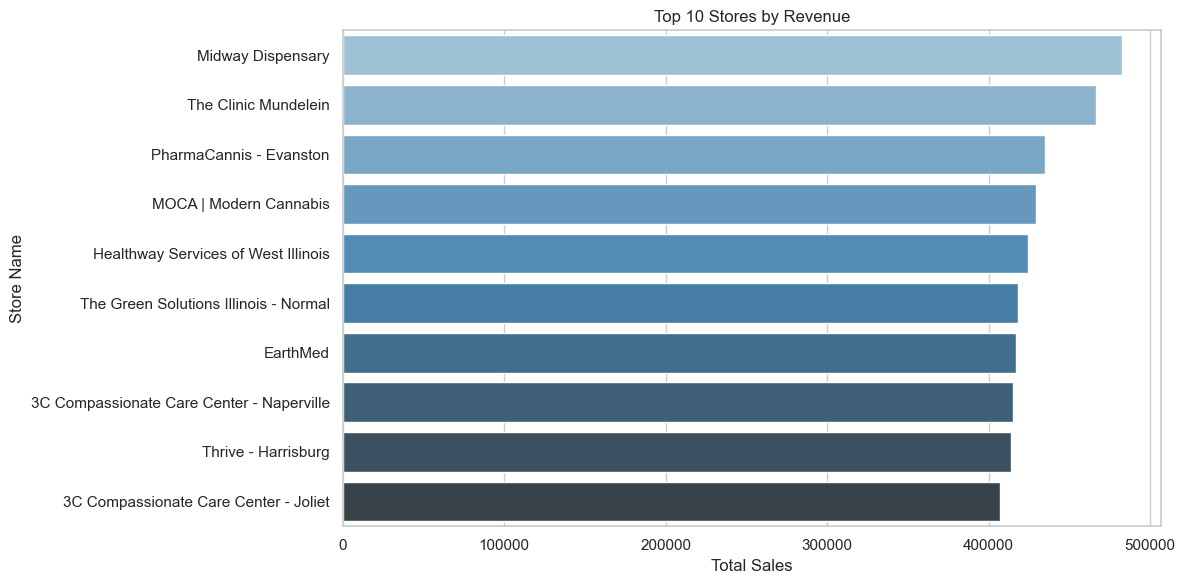

In [ ]:
# Top 10 stores by revenue chart

plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_store, x="total_sales", y="store_name", palette="Blues_d")
plt.title("Top 10 Stores by Revenue")
plt.xlabel("Total Sales")
plt.ylabel("Store Name")
plt.tight_layout()
plt.show()

In [ ]:
# 2. Revenue by State + Average Transaction Value
query_avg_transaction_by_state = """
    SELECT 
        l.state,
        sr.tax_rate,
        COUNT(DISTINCT co.ord_id) AS total_orders,
        SUM(co.ord_itm_qty) AS total_quantity_sold,
        SUM(co.ord_itm_total) AS total_sales,
        ROUND(SUM(co.ord_itm_total) * 1.0 / COUNT(DISTINCT co.ord_id), 2) AS avg_transaction_value
    FROM customer_orders AS co
    JOIN locations AS l ON co.loc_id = l.unq_id
    JOIN state_reg AS sr ON l.state = sr.state
    GROUP BY l.state, sr.tax_rate
    ORDER BY total_sales DESC;
"""
state_sales = pd.read_sql_query(query_avg_transaction_by_state, con=engine)

state_sales

,state,tax_rate,total_orders,total_quantity_sold,total_sales,avg_transaction_value
0,CA,"{""s"": 0.15, ""i"": 0.12, ""c"": 0.31}",296377,641477,38242701.14,129.03
1,WA,"{""s"": 0.11, ""i"": 0.2, ""c"": 0.33}",178466,383103,23362165.94,130.91
2,OR,"{""s"": 0.05, ""i"": 0.22, ""c"": 0.23}",169102,344912,21023179.95,124.32
3,CO,"{""s"": 0.09, ""i"": 0.18, ""c"": 0.27}",166934,340731,19979688.37,119.69
4,IL,"{""s"": 0.13, ""i"": 0.12, ""c"": 0.22}",110456,282109,16056776.67,145.37
5,AZ,"{""s"": 0.09, ""i"": 0.19, ""c"": 0.29}",69786,160706,9531979.60,136.59
6,NV,"{""s"": 0.14, ""i"": 0.15, ""c"": 0.37}",34817,76011,4414400.90,126.79
7,NM,"{""s"": 0.13, ""i"": 0.26, ""c"": 0.29}",28219,65208,3542770.33,125.55


/var/folders/9y/yw19l42n7hd06kd12zgl6yvc0000gp/T/ipykernel_99663/1100360985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x="state", y="total_sales", palette="viridis")


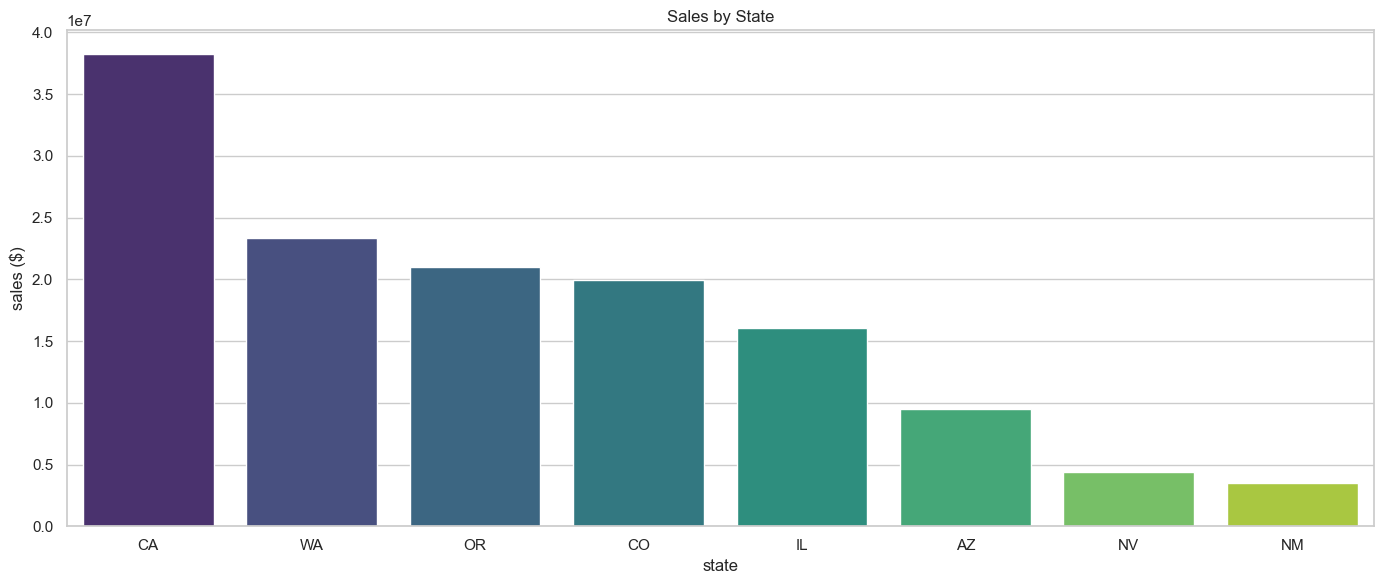

In [ ]:
#revenue by state chart

plt.figure(figsize=(14, 6))
sns.barplot(data=state_sales, x="state", y="total_sales", palette="viridis")
plt.title("Sales by State")
plt.ylabel("sales ($)")
plt.tight_layout()
plt.show()

/var/folders/9y/yw19l42n7hd06kd12zgl6yvc0000gp/T/ipykernel_99663/2273987881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x="state", y="avg_transaction_value", palette="viridis")


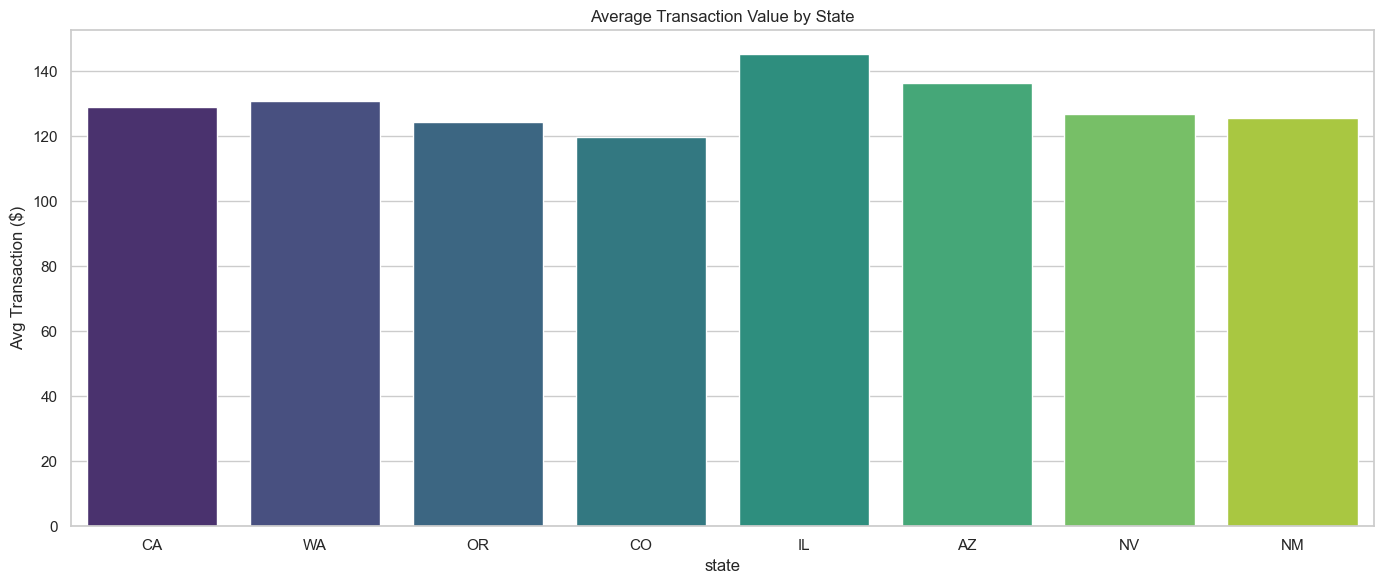

In [ ]:
# Avg transaction value by state chart

plt.figure(figsize=(14, 6))
sns.barplot(data=state_sales, x="state", y="avg_transaction_value", palette="viridis")
plt.title("Average Transaction Value by State")
plt.ylabel("Avg Transaction ($)")
plt.tight_layout()
plt.show()

In [ ]:
# 3. Top Products by Type & Brand
query_top_products = """
    SELECT 
        pt.category AS product_type,
        b.name AS brand_name,
        SUM(co.ord_itm_qty) AS total_units_sold
    FROM customer_orders AS co
    JOIN product_inventory AS pi ON co.prod_inv_id = pi.unq_id
    JOIN product_types AS pt ON pi.prod_type_id = pt.unq_id
    JOIN brands AS b ON pi.brand_id = b.unq_id
    GROUP BY pt.category, b.name
    ORDER BY total_units_sold DESC
    LIMIT 10;
"""
top_products = pd.read_sql_query(query_top_products, con=engine)

top_products

,product_type,brand_name,total_units_sold
0,preroll,Aladdins Smoke,49726
1,concentrate,Aladdins Smoke,43184
2,flower,Aladdins Smoke,37814
3,preroll,Pavilion,27043
4,preroll,Headdies,26814
5,preroll,Remedy,26736
6,preroll,Smokers Expo,26076
7,preroll,English Tobacco,25740
8,preroll,2nd Ave Smoke,25702
9,preroll,Songbirds,25540


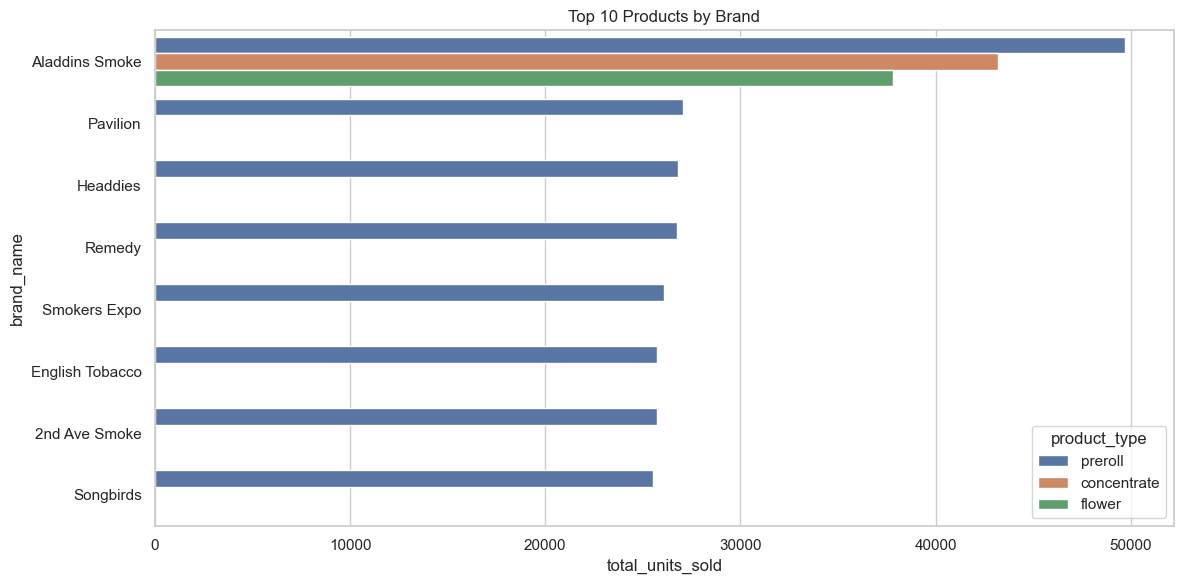

In [108]:
# Top 10 products by brand chart

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x="total_units_sold", y="brand_name", hue="product_type")
plt.title("Top 10 Products by Brand")
plt.tight_layout()
plt.show()

/var/folders/9y/yw19l42n7hd06kd12zgl6yvc0000gp/T/ipykernel_99663/1972005455.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="total_units_sold", y="product_type", palette="viridis")


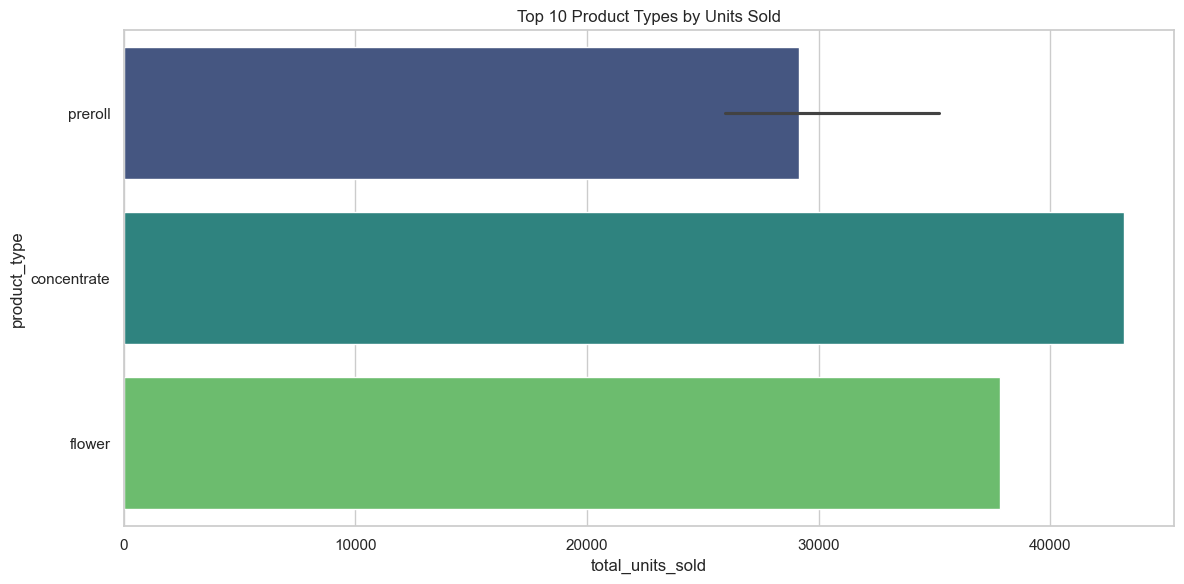

In [112]:
# Top 10 products types by sales chart

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x="total_units_sold", y="product_type", palette="viridis")
plt.title("Top 10 Product Types by Units Sold")
plt.tight_layout()
plt.show()

In [113]:
# 4. Regional Sales by Store
query_regional_sales = """
    SELECT 
        l.name AS store_name,
        l.city,
        l.state,
        SUM(co.ord_itm_qty) AS total_units_sold,
        SUM(co.ord_itm_total) AS total_revenue
    FROM customer_orders AS co
    JOIN locations AS l ON co.loc_id = l.unq_id
    GROUP BY l.name, l.city, l.state
    ORDER BY total_revenue DESC
    LIMIT 10;
"""
regional_sales = pd.read_sql_query(query_regional_sales, con=engine)

regional_sales

,store_name,city,state,total_units_sold,total_revenue
0,Midway Dispensary,Chicago,IL,7253,482669.36
1,The Clinic Mundelein,Mundelein,IL,6550,466825.81
2,PharmaCannis - Evanston,Evanston,IL,6745,434878.88
3,MOCA | Modern Cannabis,Chicago,IL,6624,429242.99
4,Healthway Services of West Illinois,St. Charles,IL,6649,424333.74
5,The Green Solutions Illinois - Normal,Normal,IL,6659,418341.82
6,EarthMed,Addison,IL,6390,417106.16
7,3C Compassionate Care Center - Naperville,Naperville,IL,6477,415260.30
8,Thrive - Harrisburg,Harrisburg,IL,6563,413952.22
9,3C Compassionate Care Center - Joliet,Joliet,IL,6721,407138.77


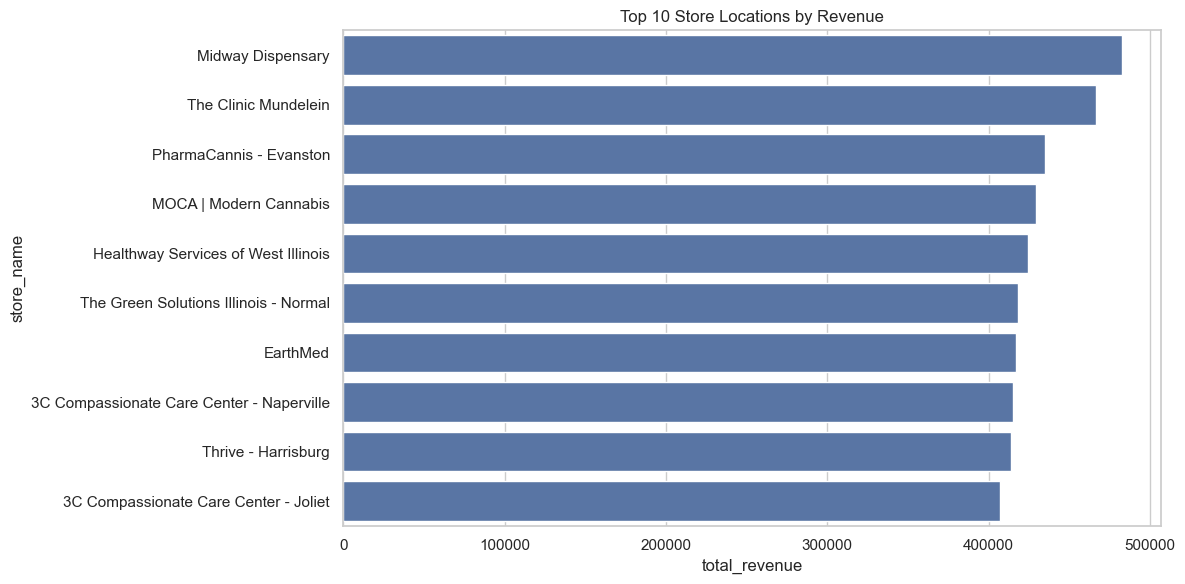

In [ ]:
# Top 10 stores by revenue chart

plt.figure(figsize=(12, 6))
sns.barplot(data=regional_sales, x="total_revenue", y="store_name")
plt.title("Top 10 Store Locations by Revenue")
plt.tight_layout()
plt.show()

In [ ]:
# 5. Revenue by Product Category (Avg per transaction)
query_revenue_by_category = """
    SELECT 
        pt.category AS product_type,
        ROUND(AVG(co.ord_itm_total), 2) AS avg_transaction_value
    FROM customer_orders AS co
    JOIN product_inventory AS pi ON co.prod_inv_id = pi.unq_id
    JOIN product_types AS pt ON pi.prod_type_id = pt.unq_id
    GROUP BY pt.category
    ORDER BY avg_transaction_value DESC;
"""
revenue_by_category = pd.read_sql_query(query_revenue_by_category, con=engine)

revenue_by_category

,product_type,avg_transaction_value
0,flower,266.47
1,concentrate,139.97
2,preroll,70.61
3,topical,62.04
4,tincture,45.47
5,vape,38.37
6,edible,37.67
7,capsule,30.22
8,beverage,24.98


/var/folders/9y/yw19l42n7hd06kd12zgl6yvc0000gp/T/ipykernel_99663/3056918152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_category, x="avg_transaction_value", y="product_type", palette="coolwarm")


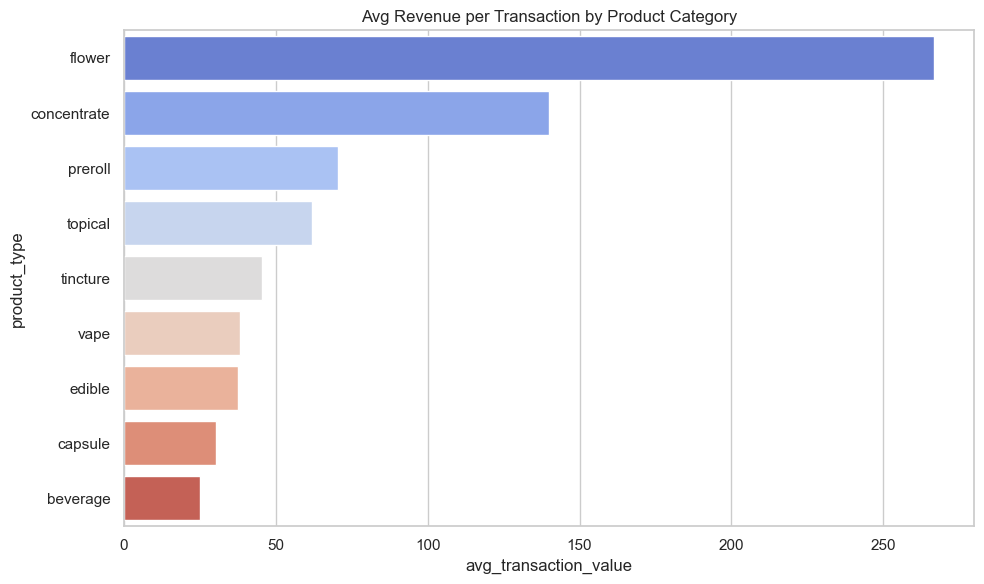

In [ ]:
# Avg revenue per transaction by product category chart

plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_category, x="avg_transaction_value", y="product_type", palette="coolwarm")
plt.title("Avg Revenue per Transaction by Product Category")
plt.tight_layout()
plt.show()

In [117]:
# Customer Behavior by State
query_customer_by_state = """
    SELECT 
        state,
        segment,
        COUNT(*) AS num_customers
    FROM (
        SELECT 
            co.cust_id,
            l.state,
            CASE 
                WHEN COUNT(DISTINCT co.ord_id) = 1 THEN 'One-Time'
                ELSE 'Frequent'
            END AS segment
        FROM customer_orders AS co
        JOIN locations AS l ON co.loc_id = l.unq_id
        GROUP BY co.cust_id, l.state
    )
    GROUP BY state, segment
    ORDER BY state, segment;
"""
cust_state_segment = pd.read_sql_query(query_customer_by_state, con=engine)

cust_state_segment

,state,segment,num_customers
0,AZ,Frequent,10740
1,AZ,One-Time,1411
2,BC,Frequent,37
3,BC,One-Time,845
4,CA,Frequent,13900
5,CA,One-Time,2
6,CO,Frequent,12653
7,CO,One-Time,7
8,IL,Frequent,7234
9,IL,One-Time,3773


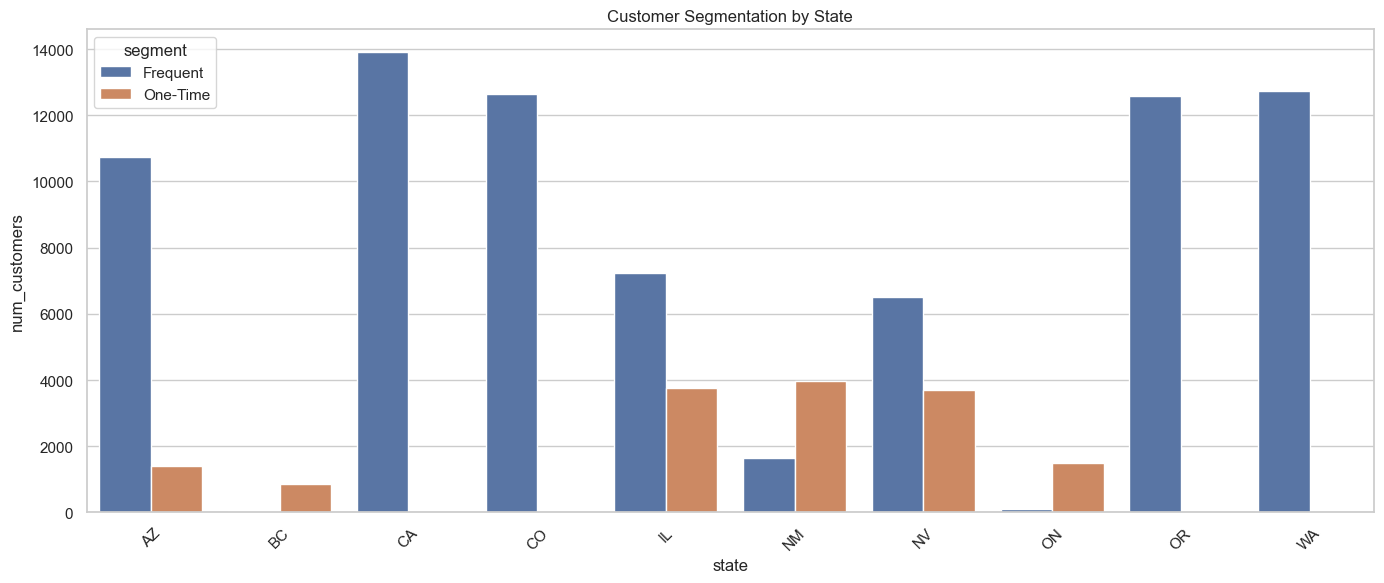

In [118]:
plt.figure(figsize=(14, 6))
sns.barplot(data=cust_state_segment, x="state", y="num_customers", hue="segment")
plt.title("Customer Segmentation by State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()